<a href="https://colab.research.google.com/github/FrancescaMoi/SentimentAnalysis/blob/main/sentyment_analysis_IMDb_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment analysis**
La **sentiment analysis** è una tecnica di *Natural Language Processing* che consiste nell'identificare l'intenzione/sentimento che sta dietro un testo. 

Questo tipo di analisi viene spesso eseguita sui feedback dei clienti per aiutare le aziende a monitorare il grado di apprezzamento del proprio prodotto e comprendere le esigenze dei clienti.

## **Caricamento del dataset**

Il dataset utilizzato consiste in un CSV contenente un elenco di 50K recensioni di film messe a disposizione dalla piattaforma [*kaggle*](https://www.kaggle.com/),, precedentemente etichettate come positive o negative. Il CSV può essere scaricato al seguente link:
[*IMDb dataset*](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews).

Una volta scaricato il CSV, carichiamo in memoria il dataset sfruttando le funzionalità della libreria [pandas](https://pandas.pydata.org/docs/index.html):

In [1]:
import pandas as pd

df = pd.read_csv("drive/MyDrive/Colab Notebooks/PilloleIA/data/IMDB Dataset.csv")

### **Colonne del dataset**
La colonna *review * contiene l'informazione testuale di input e la colonna *sentiment* contiene la label che vogliamo ottenere in output. L'obiettivo del classificatore che andremo a creare è quella di predire la label *sentiment* data in input il testo di una *review*.

Vediamo come si presenta il dataset prendendo le prime 5 righe:

In [2]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## **Analisi del dataset**

Una delle fasi più importanti nello sviluppo di un sistema di IA è l'**analisi del dataset**. E' indispensabile essere a conoscenza di come si presenta il dato che si ha disposizione e di come sono distribuite le classi all'interno del dataset.

### **Analisi numerosità e presenza di valori nulli**

Per prima cosa verifichiamo la numerosità dei dati a nostra disposizione:

In [4]:
# Numerosità dataset
df.shape

(50000, 2)

Verifichiamo poi la presenza di valori nulli all'interno del dataframe e, in caso positivo andiamo a rimuoverli:

In [11]:
# Analisi presenza di valori nulli
df.isnull().any() 

review       False
sentiment    False
dtype: bool

Come si può vedere, il dataset non contiene valori nulli nè all'interno della colonna *review*, nè nella colonna *sentiment*.

### **Analisi distribuzione delle classi**
Possiamo procedere analizzando **come i valori della colonna target si distribuiscono sul dataset**. Per fare ciò sfruttiamo le funzionalità offerte dalle librerie [seaborn](https://seaborn.pydata.org/) e [matplotlib](https://matplotlib.org/) che ci forniscono una visualizzazione grafica della distribuzione dei dati contenuti **nella** colonna *sentiment*.

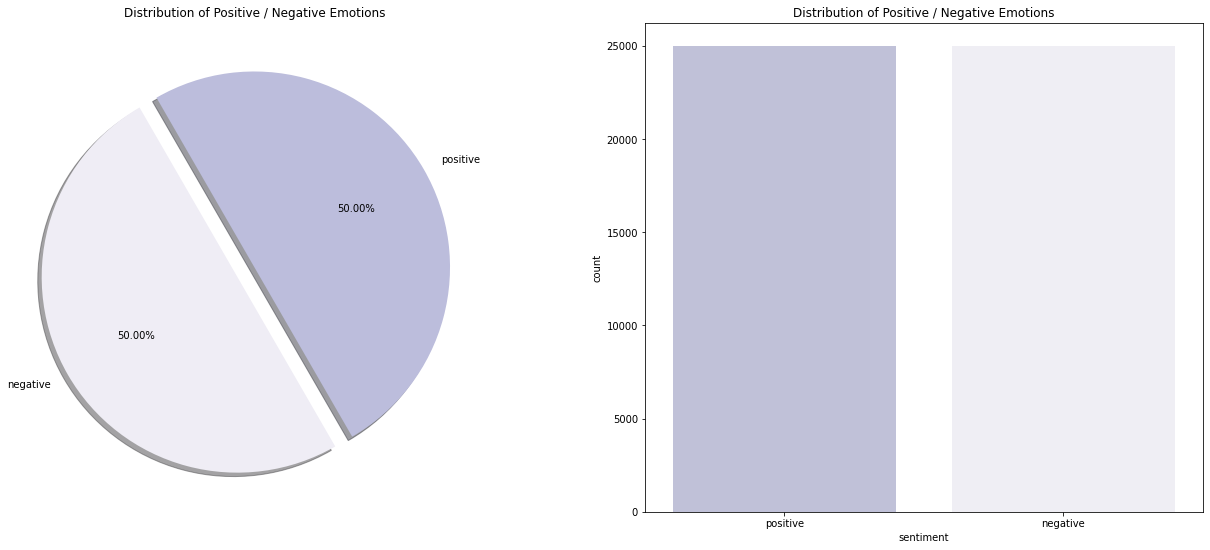

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

fig , ax = plt.subplots(1,2,figsize=(22,9))

# Grafico a torta con matplotlib
df['sentiment'].value_counts().plot.pie(explode=[0,0.1],
                                        autopct='%1.2f%%',
                                        ax=ax[0],
                                        shadow=True,
                                        startangle=300,
                                        colors = ["#bcbddc", "#efedf5"])
ax[0].set_ylabel('')
ax[0].set_title('Distribution of Positive / Negative Emotions')

# Istogramma con seaborn
sns.countplot(x=df['sentiment'],
              ax=ax[1],
              palette=["#bcbddc", "#efedf5"])

ax[1].set_title('Distribution of Positive / Negative Emotions')

plt.show()

Come si può notare dai grafici, il dataset è **perfettamente bilanciato**: il 50% delle review appartengono alla classe *positive* e il restante 50% appartengono alla classe *negative*.

## **Data Cleaning**
La fase di pulizia dei dati è la fase più importante nella creazione di un modello di IA efficace. Se i dati di input sono sporchi il modello di NLP non riesce ad imparare correttamente le regole e le logiche che si nascondono nel testo, ottenendo dei risultati scarsi.

Vediamo ad esempio la prima review presente nel dataset:

In [38]:
df.loc[0, 'review']


"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = nltk.WordNetLemmatizer()

In [ ]:
import re

def clean_text(text):
  text = re.sub("<br />", "", text) # removing break line tag
  text = re.sub("[^a-zA-Z0-9\s]", " ", text) # removing punctuation
  text = re.sub("\s+", " ", text) # removing multiple spaces
  text = text.strip() # removing spaces before and after the string
  text = text.lower() # transform the text in lower case format
  text_tokens = [word for word in text.split() if word not in stop_words] # removing stopwords
  text_tokens = [word for word in text_tokens if word.isalpha()] 
  # text_tokens = [lemmatizer.lemmatize(word) for word in text_tokens] # lemmatizing words
  cleaned_text = ' '.join(text_tokens)
  return cleaned_text

df['review'] = df['review'].apply(lambda x: clean_text(x))
df['review']

**Split the dataset**

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['sentiment'])

print("Train set shape: ", df_train.shape)
print("Test set shape: ", df_test.shape)

print("\nTrain set classes distribution:\n", df_train['sentiment'].value_counts())
print("\nTest set classes distribution:\n", df_test['sentiment'].value_counts())



**Vectorize texts**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
train_vectors = vectorizer.fit_transform(df_train['review'])
test_vectors = vectorizer.transform(df_test['review'])


In [ ]:
vectorized_train_df = pd.DataFrame(train_vectors.toarray(), columns=vectorizer.get_feature_names())
vectorized_train_df.head()

**Training**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(train_vectors, df_train['sentiment'])

**Testing and results evaluation**

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score

y_pred = rf_model.predict(test_vectors)
y_test = df_test['sentiment']

accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred, pos_label='positive'), 3)
recall = round(recall_score(y_test, y_pred, pos_label='positive'), 3)
f1 = round(f1_score(y_test,y_pred, pos_label='positive'), 3)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", f1)